# Importing libraries and dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks
import pickle
import datetime
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


# Importing dataset

In [2]:
df = pd.read_csv('Sport car price.csv')
df

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


# Data Preprocessing and analysis


In [3]:
df.shape

(1007, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [6]:
set(df['Car Make'])

{'Acura',
 'Alfa Romeo',
 'Alpine',
 'Ariel',
 'Aston Martin',
 'Audi',
 'BMW',
 'Bentley',
 'Bugatti',
 'Chevrolet',
 'Dodge',
 'Ferrari',
 'Ford',
 'Jaguar',
 'Kia',
 'Koenigsegg',
 'Lamborghini',
 'Lexus',
 'Lotus',
 'Maserati',
 'Mazda',
 'McLaren',
 'Mercedes-AMG',
 'Mercedes-Benz',
 'Nissan',
 'Pagani',
 'Pininfarina',
 'Polestar',
 'Porsche',
 'Rimac',
 'Rolls-Royce',
 'Shelby',
 'Subaru',
 'TVR',
 'Tesla',
 'Toyota',
 'Ultima',
 'W Motors'}

In [7]:

len(set(df['Car Make']))
#Many categorical data let's ignore them for now for using my linear Regression Method


38

In [8]:
set(df['Car Model'])

{'1',
 '370Z',
 '370Z Coupe',
 '370Z Nismo',
 '400Z',
 '488 GTB',
 '4C',
 '4C Spider',
 '570S',
 '570S Spider',
 '600LT',
 '600LT Spider',
 '718 Boxster',
 '718 Cayman',
 '718 Cayman GT4',
 '720S',
 '765LT',
 '812 Superfast',
 '911',
 '911 Turbo S',
 '918 Spyder',
 'A110',
 'AMG A45',
 'AMG C 63',
 'AMG C 63 S',
 'AMG C43 Coupe',
 'AMG C63',
 'AMG GT',
 'AMG GT 4-Door Coupe',
 'AMG GT 63 S',
 'AMG GT Black Series',
 'AMG GT R',
 'Artura',
 'Atom',
 'Aventador',
 'Aventador S',
 'Aventador SVJ',
 'Battista',
 'Boxster',
 'C 63 AMG',
 'C 63 S',
 'C 63 S Coupe',
 'C63 AMG',
 'C63 S',
 'C63 S AMG',
 'C63 S Coupe',
 'CLS63 AMG',
 'C_Two',
 'Camaro',
 'Camaro SS',
 'Camaro SS 1LE',
 'Camaro SS Convertible',
 'Camaro ZL1',
 'Cayman',
 'Cayman GT4',
 'Challenger',
 'Challenger Hellcat',
 'Challenger Hellcat Redeye',
 'Challenger R/T',
 'Challenger SRT Hellcat',
 'Challenger SRT Hellcat Redeye',
 'Charger',
 'Charger Hellcat',
 'Charger SRT Hellcat',
 'Chiron',
 'Chiron Pur Sport',
 'Chiron Sup

In [9]:
len(set(df['Car Model']))

176

In [10]:
df.columns

Index(['Car Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower',
       'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)'],
      dtype='object')

Car Make has less number of categorical data then Car Model but if we use convert them into numbers
it can lead to curse of dimensionality and that it can adversely affect the performance of machine learning algorithms
like linear models (e.g., linear regression, logistic regression) may struggle with high dimensionality, leading to longer training times and potential overfitting.So we drop them 

In [11]:
df.drop(columns=['Car Make', 'Car Model'],axis=1,inplace=True)

In [12]:
df

,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,2022,3,379,331,4,"101,200"
1,2021,5.2,630,443,2.8,"274,390"
2,2022,3.9,661,561,3,"333,750"
3,2022,5.2,562,406,3.2,"142,700"
4,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...
1002,2022,5,1280,1106,2.5,"3,000,000"
1003,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,2021,4,789,590,2.7,"1,000,000"
1005,2021,6,764,738,3,"2,600,000"


Lets convert datatype into numeric values


In [13]:
#converting to numeric format, and any values that cannot be converted are replaced with NaN
#common data preprocessing step when working with datasets containing mixed data types or when dealing with potentially messy data.
df['Engine Size (L)'] = pd.to_numeric(df['Engine Size (L)'], errors='coerce')
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')
df['Torque (lb-ft)'] = pd.to_numeric(df['Torque (lb-ft)'], errors='coerce')
df['0-60 MPH Time (seconds)'] = pd.to_numeric(df['0-60 MPH Time (seconds)'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     1007 non-null   int64  
 1   Engine Size (L)          948 non-null    float64
 2   Horsepower               998 non-null    float64
 3   Torque (lb-ft)           999 non-null    float64
 4   0-60 MPH Time (seconds)  1006 non-null   float64
 5   Price (in USD)           1007 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 47.3+ KB


In [14]:
df['Price (in USD)']=df['Price (in USD)'].str.replace(',', '')
df['Price (in USD)']=df['Price (in USD)'].astype(float)

In [15]:
df

,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,2022,3.0,379.0,331.0,4.00,101200.0
1,2021,5.2,630.0,443.0,2.80,274390.0
2,2022,3.9,661.0,561.0,3.00,333750.0
3,2022,5.2,562.0,406.0,3.20,142700.0
4,2021,4.0,710.0,568.0,2.70,298000.0
...,...,...,...,...,...,...
1002,2022,5.0,1280.0,1106.0,2.50,3000000.0
1003,2021,NaN,1972.0,1254.0,2.00,2000000.0
1004,2021,4.0,789.0,590.0,2.70,1000000.0
1005,2021,6.0,764.0,738.0,3.00,2600000.0


In [16]:
df.fillna(df.mean(skipna=True),inplace=True)
df

,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,2022,3.000000,379.0,331.0,4.00,101200.0
1,2021,5.200000,630.0,443.0,2.80,274390.0
2,2022,3.900000,661.0,561.0,3.00,333750.0
3,2022,5.200000,562.0,406.0,3.20,142700.0
4,2021,4.000000,710.0,568.0,2.70,298000.0
...,...,...,...,...,...,...
1002,2022,5.000000,1280.0,1106.0,2.50,3000000.0
1003,2021,4.395781,1972.0,1254.0,2.00,2000000.0
1004,2021,4.000000,789.0,590.0,2.70,1000000.0
1005,2021,6.000000,764.0,738.0,3.00,2600000.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     1007 non-null   int64  
 1   Engine Size (L)          1007 non-null   float64
 2   Horsepower               1007 non-null   float64
 3   Torque (lb-ft)           1007 non-null   float64
 4   0-60 MPH Time (seconds)  1007 non-null   float64
 5   Price (in USD)           1007 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 47.3 KB


In [18]:
df.describe()

,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,2021.201589,4.395781,627.324649,542.185185,3.515010,3.820359e+05
std,2.019802,1.357163,298.628959,241.543168,0.775972,7.383227e+05
min,1965.000000,0.000000,181.000000,0.000000,1.800000,2.500000e+04
25%,2021.000000,3.500000,454.000000,406.000000,2.900000,7.180000e+04
50%,2021.000000,4.000000,591.000000,509.000000,3.500000,1.400000e+05
75%,2022.000000,5.200000,671.000000,602.000000,4.000000,2.500000e+05
max,2023.000000,8.400000,2000.000000,1732.000000,6.500000,5.200000e+06


In [19]:
import datetime
yr = datetime.datetime.now().year
df['Age'] = yr - df['Year']
df.describe()

,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Age
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03,1007.000000
mean,2021.201589,4.395781,627.324649,542.185185,3.515010,3.820359e+05,2.798411
std,2.019802,1.357163,298.628959,241.543168,0.775972,7.383227e+05,2.019802
min,1965.000000,0.000000,181.000000,0.000000,1.800000,2.500000e+04,1.000000
25%,2021.000000,3.500000,454.000000,406.000000,2.900000,7.180000e+04,2.000000
50%,2021.000000,4.000000,591.000000,509.000000,3.500000,1.400000e+05,3.000000
75%,2022.000000,5.200000,671.000000,602.000000,4.000000,2.500000e+05,3.000000
max,2023.000000,8.400000,2000.000000,1732.000000,6.500000,5.200000e+06,59.000000


In [20]:
df.head()

,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Age
0,2022,3.0,379.0,331.0,4.0,101200.0,2
1,2021,5.2,630.0,443.0,2.8,274390.0,3
2,2022,3.9,661.0,561.0,3.0,333750.0,2
3,2022,5.2,562.0,406.0,3.2,142700.0,2
4,2021,4.0,710.0,568.0,2.7,298000.0,3


#### There is unnecessary columns named Unnamed:0 which is not needed so we remove that column

In [53]:
df.head()

,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Age
0,2022,3.0,379.0,331.0,4.0,101200.0,2
1,2021,5.2,630.0,443.0,2.8,274390.0,3
2,2022,3.9,661.0,561.0,3.0,333750.0,2
3,2022,5.2,562.0,406.0,3.2,142700.0,2
4,2021,4.0,710.0,568.0,2.7,298000.0,3


In [25]:
df.isnull().sum()

Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
Age                        0
dtype: int64

# Data analysis using plot diagram

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

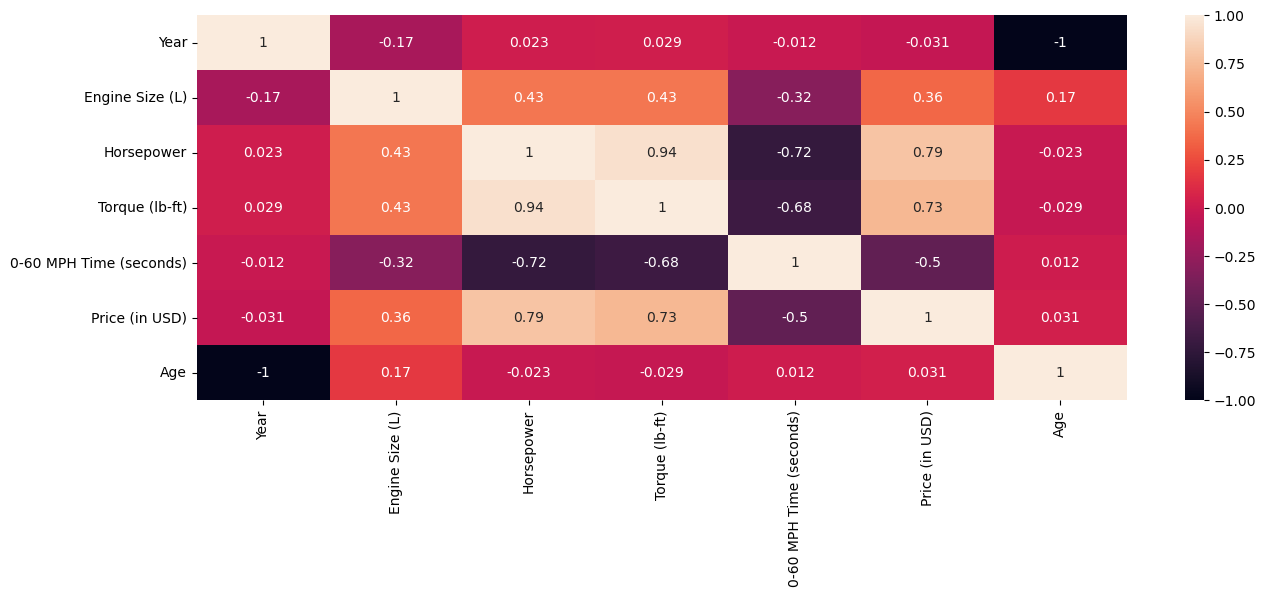

In [55]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

C:\Users\sujis\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


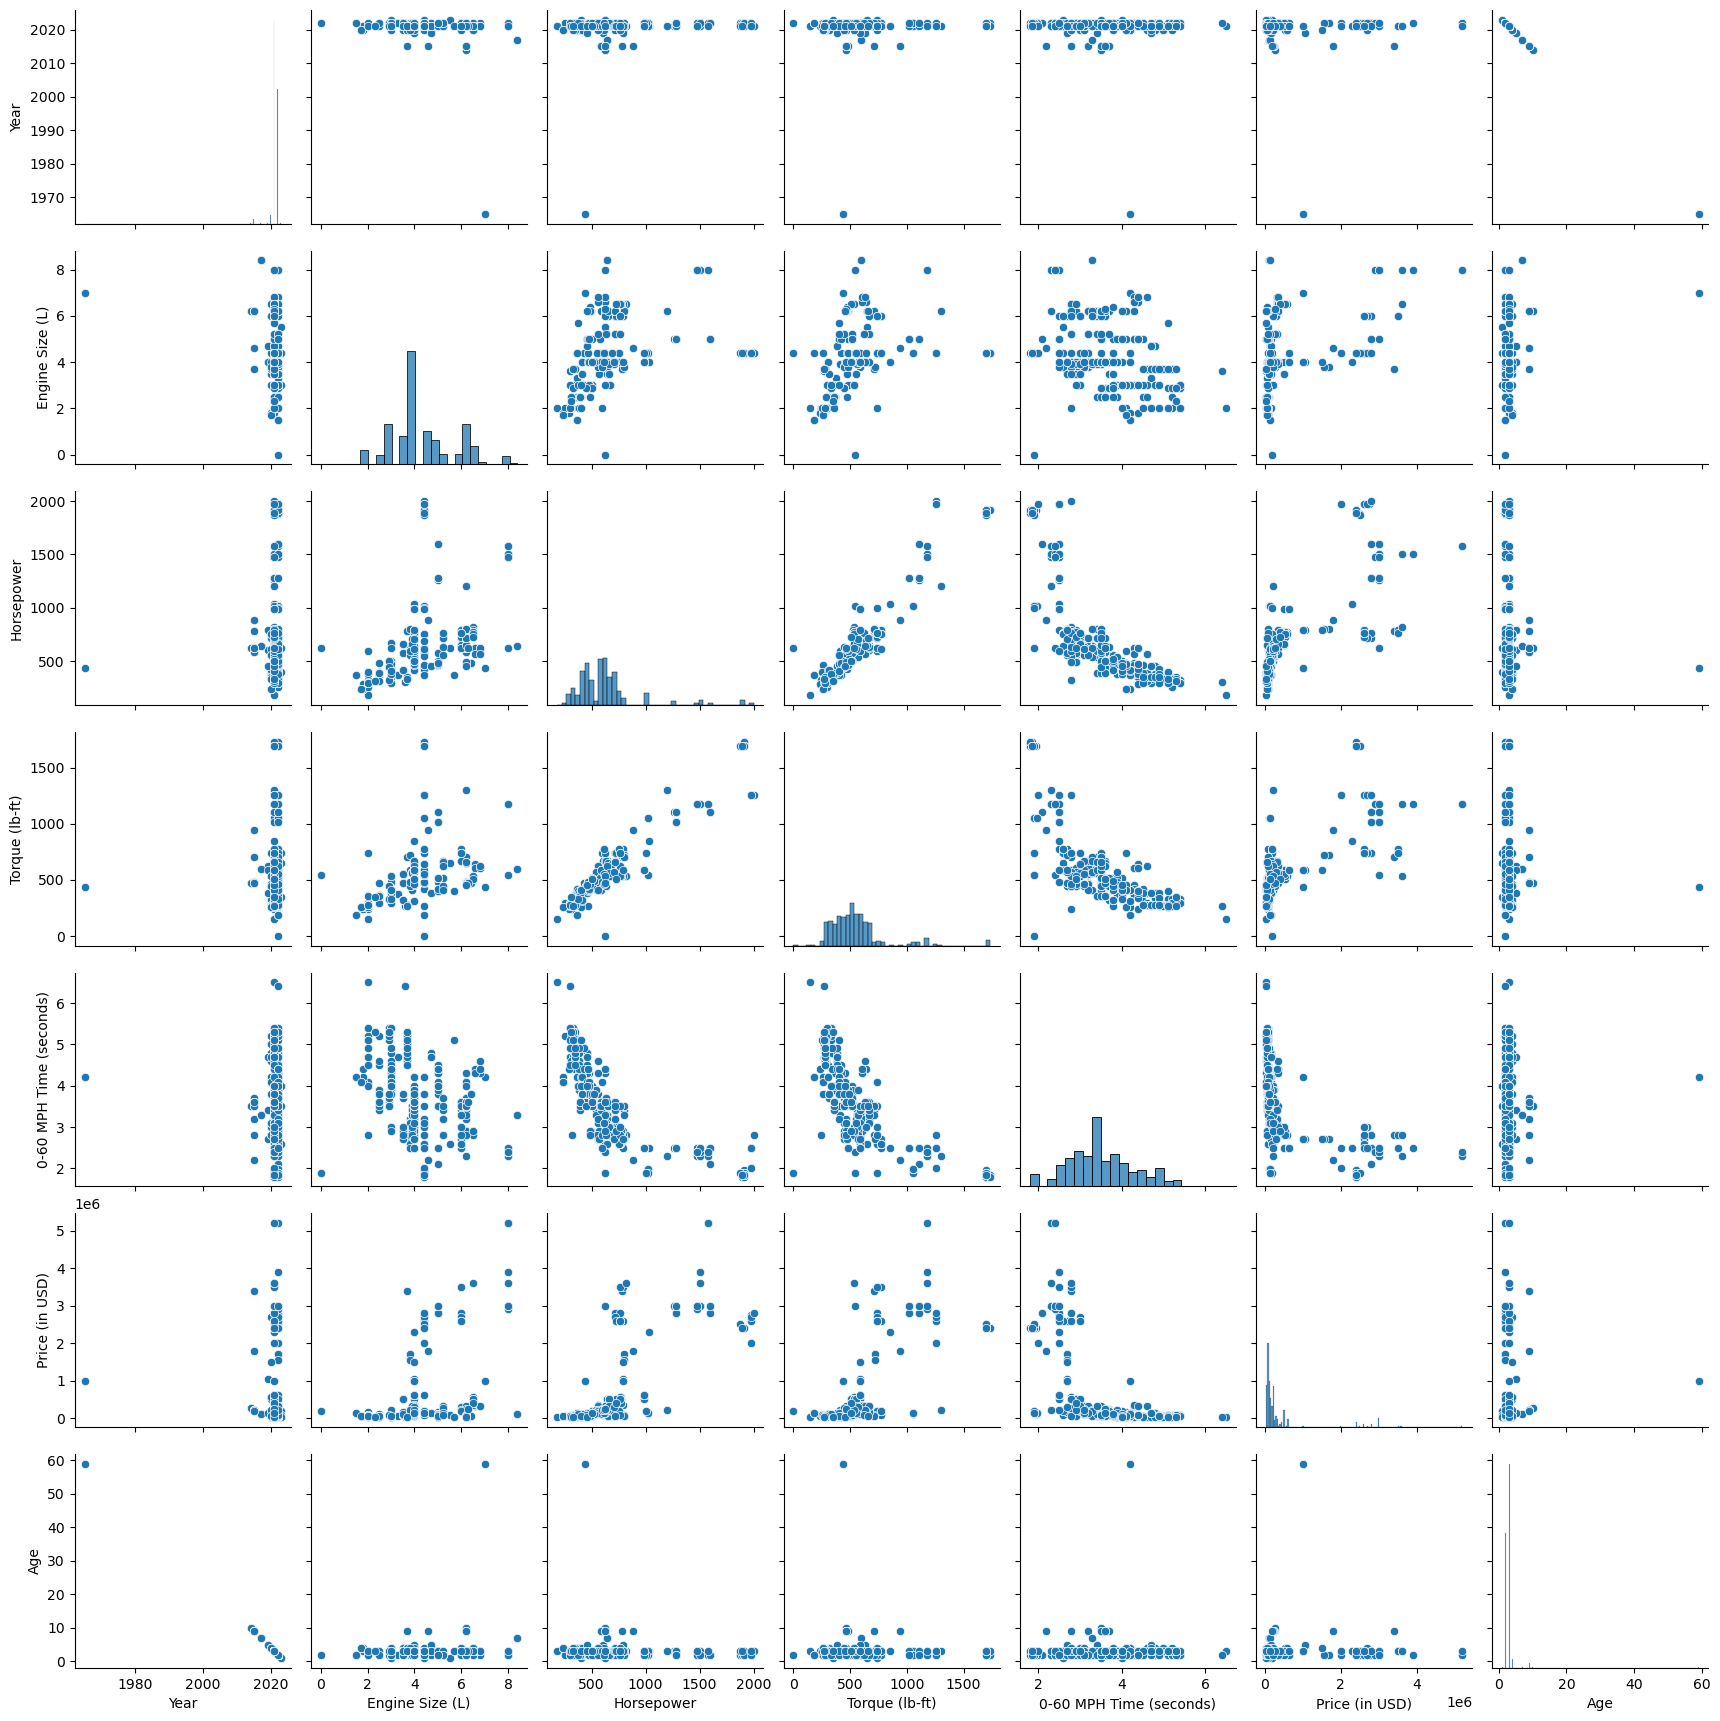

In [56]:
sns.pairplot(df)

In [63]:
df.drop(columns=['Year', 'Age'],axis=1,inplace=True)
df

,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,3.000000,379.0,331.0,4.00,101200.0
1,5.200000,630.0,443.0,2.80,274390.0
2,3.900000,661.0,561.0,3.00,333750.0
3,5.200000,562.0,406.0,3.20,142700.0
4,4.000000,710.0,568.0,2.70,298000.0
...,...,...,...,...,...
1002,5.000000,1280.0,1106.0,2.50,3000000.0
1003,4.395781,1972.0,1254.0,2.00,2000000.0
1004,4.000000,789.0,590.0,2.70,1000000.0
1005,6.000000,764.0,738.0,3.00,2600000.0


### Saving cleaned data so that we don't have to pre process the data

In [64]:
df.to_csv("cleaned_sports_car_data.csv",index=False)

### Loading the cleaned data

In [7]:
#loading the cleaned_data 
df = pd.read_csv("cleaned_sports_car_data.csv")
df.head()

,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,3.0,379.0,331.0,4.0,101200.0
1,5.2,630.0,443.0,2.8,274390.0
2,3.9,661.0,561.0,3.0,333750.0
3,5.2,562.0,406.0,3.2,142700.0
4,4.0,710.0,568.0,2.7,298000.0


# Splitting dataset into train and test sets

In [66]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Price (in USD)',axis=1)
y=df['Price (in USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [67]:
X_train

,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds)
981,6.200000,717.0,656.0,3.50
971,3.000000,379.0,331.0,4.00
47,2.500000,394.0,369.0,3.90
527,4.395781,1020.0,1050.0,1.98
869,4.395781,750.0,774.0,2.60
...,...,...,...,...
767,3.000000,444.0,406.0,3.80
72,4.000000,503.0,516.0,3.80
908,5.000000,471.0,398.0,4.40
235,4.000000,414.0,309.0,4.20


In [68]:
X_test

,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds)
912,4.000000,469.0,479.0,3.8
843,4.395781,469.0,263.0,3.8
293,6.200000,650.0,650.0,3.5
554,4.000000,620.0,604.0,2.9
581,6.200000,650.0,650.0,3.5
...,...,...,...,...
594,3.800000,562.0,443.0,3.1
672,3.500000,660.0,550.0,2.8
899,2.000000,300.0,280.0,4.5
604,4.000000,641.0,627.0,3.6


In [69]:
y_train

981     64195.0
971    101200.0
47      56200.0
527    140000.0
869    185000.0
         ...   
767     84595.0
72      70100.0
908     92950.0
235    100200.0
37     104000.0
Name: Price (in USD), Length: 805, dtype: float64

# Machine learning

In [70]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
model = lm.fit(X_train, y_train)



In [71]:
#testing

In [72]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared: ",r2)


R-squared:  0.6687363886594764


<function matplotlib.pyplot.show(close=None, block=None)>

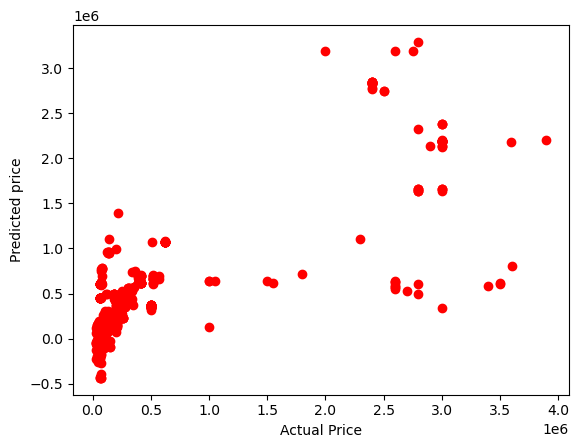

In [73]:
plt.scatter(y_train,model.predict(X_train),color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.show

# Decision Tree algorithm

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
tree_model = DecisionTreeRegressor()

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

In [76]:
# Calculate R-squared value
r2 = r2_score(y_test, y_pred_tree)
print("R-squared: ",r2)

R-squared:  0.8984099447177537


<function matplotlib.pyplot.show(close=None, block=None)>

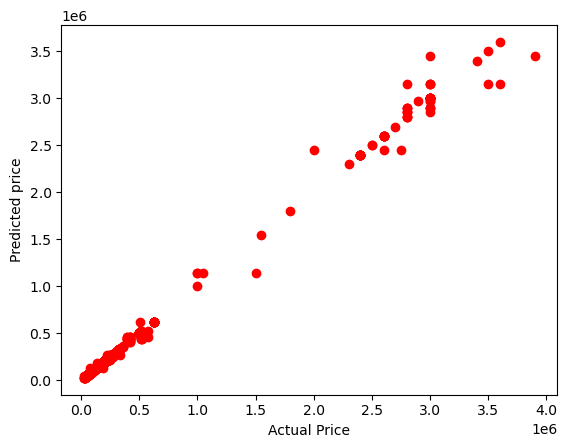

In [77]:
plt.scatter(y_train,tree_model.predict(X_train),color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.show

# Prediction from asking from user

In [79]:
subset=df.iloc[100:101]
subset

,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
100,3.0,382.0,368.0,3.9,43090.0


In [80]:
data = {'Engine Size (L)': [3],
        'Horsepower':[382],
        'Torque (lb-ft)':[368],
        '0-60 MPH Time (seconds)':[3.9]}
user_df = pd.DataFrame(data)
predicted_price = tree_model.predict(user_df)
print("predicted price: ",predicted_price)

predicted price:  [43072.]


# Saving the model so that we don't need to train the model every time we need to predict certain sport's car price

In [81]:
with open('tree_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [82]:
# Loading the model

In [3]:
with open('tree_model.pkl', 'rb') as file:
    tree_model = pickle.load(file)

In [8]:
df.iloc[102:103]

,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
102,2.0,300.0,280.0,4.7,60500.0


In [9]:
data = {'Engine Size (L)': [2],
        'Horsepower':[300],
        'Torque (lb-ft)':[280],
        '0-60 MPH Time (seconds)':[4.7]}
user_df = pd.DataFrame(data)
predicted_price = tree_model.predict(user_df)
print("predicted price: ",predicted_price[0])

predicted price:  -212498.1003969668
